In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [15]:
class LinearRegression:

    def __init__(self):
        return
    
    def fit(self, X, y, method='analytical_solution'):
        X = np.hstack((X, np.ones((X.shape[0], 1))))

        if method == 'analytical_solution': #(https://towardsdatascience.com/analytical-solution-of-linear-regression-a0e870b038d5)
            self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
        elif method == 'gradient_descent':
            self.theta = np.random.randn(X.shape[1])

            num_iter = 1000
            lr = 0.0001
            reg_coeff = 0.1
            for i in range(num_iter):
                gradients = 2 * X.T @ (X @ self.theta - y) + reg_coeff * (2 * self.theta)
                self.theta -= lr * gradients
        else:
            raise NotImplementedError('Method not implemented')
        
    def predict(self, X):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        return X @ self.theta

In [18]:
# Create example input data
X = np.array([[2, 2], [4, 5], [7, 8]])
y = np.array([9, 17, 26])

# [Analytical solution]
# Fit linear regression model
lr = LinearRegression()
lr.fit(X, y)
print(lr.theta) # [1., 2., 3.]

# Make predictions on new data
X_new = np.array([[10, 11], [13, 14]])
y_pred = lr.predict(X_new)
print(y_pred)  # Output: [35., 44.]


# [Gradient descent]
# Fit linear regression model
lr.fit(X, y, method='gradient_descent')
print(lr.theta)

# Make predictions on new data
X_new = np.array([[10, 11], [13, 14]])
y_pred = lr.predict(X_new)
print(y_pred)

[1. 2. 3.]
[35. 44.]
[1.55604358 1.82257212 1.13075654]
[36.73948565 46.87533275]


[0.93707375 0.97565943]
[1.91273318 2.84980694 3.78688069 4.72395444 5.6610282 ]


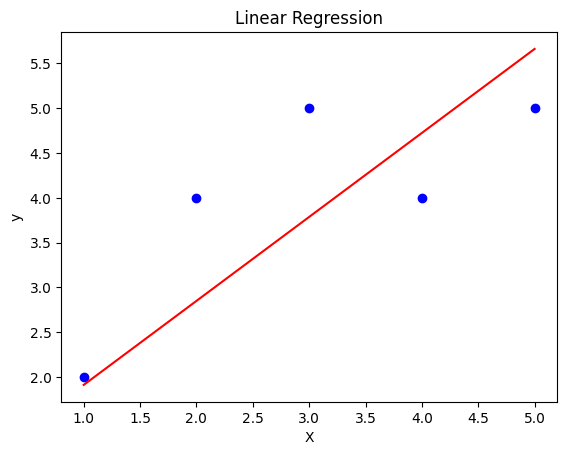

In [21]:
X = np.array([[1, 2, 3, 4, 5]]).T
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegression()
lr.fit(X, y, method='gradient_descent')
print(lr.theta)
y_pred = lr.predict(X)
print(y_pred)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()